In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Show maximum columns

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
sns.set_style("whitegrid")

### Read data set

In [5]:
df = pd.read_csv(r"C:\Users\user\Desktop\ML Learning\Credit Risk Modeling\german_credit_data.csv")

In [6]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


### Check for outliers

In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


### Check for target variable imbalance

In [8]:
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [9]:
df.shape

(1000, 11)

### Checking null values for each columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Checking info for all values

In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for duplicated values

In [13]:
df.duplicated().sum()

0

### Droping null values

In [14]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.shape

(522, 11)

In [16]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [17]:
df.drop(columns='Unnamed: 0',inplace= True)

In [18]:
df["Risk"].value_counts()

Risk
good    291
bad     231
Name: count, dtype: int64

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

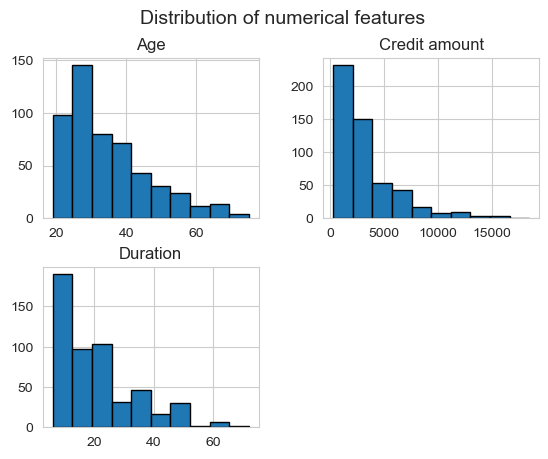

In [19]:
df[['Age','Credit amount','Duration']].hist(bins=10, edgecolor = "black")
plt.suptitle("Distribution of numerical features",fontsize = 14)
plt.show

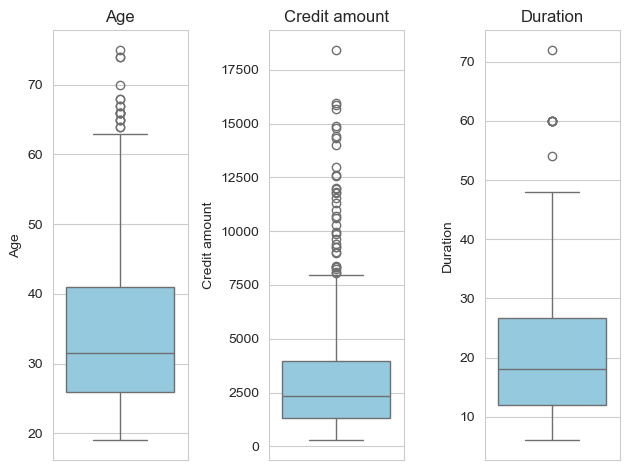

In [20]:
plt.Figure(figsize=(10,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col],color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [21]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [22]:
categorical_cols = ["Sex","Housing","Saving accounts","Checking account","Purpose"]

C:\Users\user\AppData\Local\Temp\ipykernel_3304\2315645898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order= df[col].value_counts().index)
C:\Users\user\AppData\Local\Temp\ipykernel_3304\2315645898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order= df[col].value_counts().index)
C:\Users\user\AppData\Local\Temp\ipykernel_3304\2315645898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette="Set2", order= df[col].value_counts().index)
C:\User

<function matplotlib.pyplot.show(close=None, block=None)>

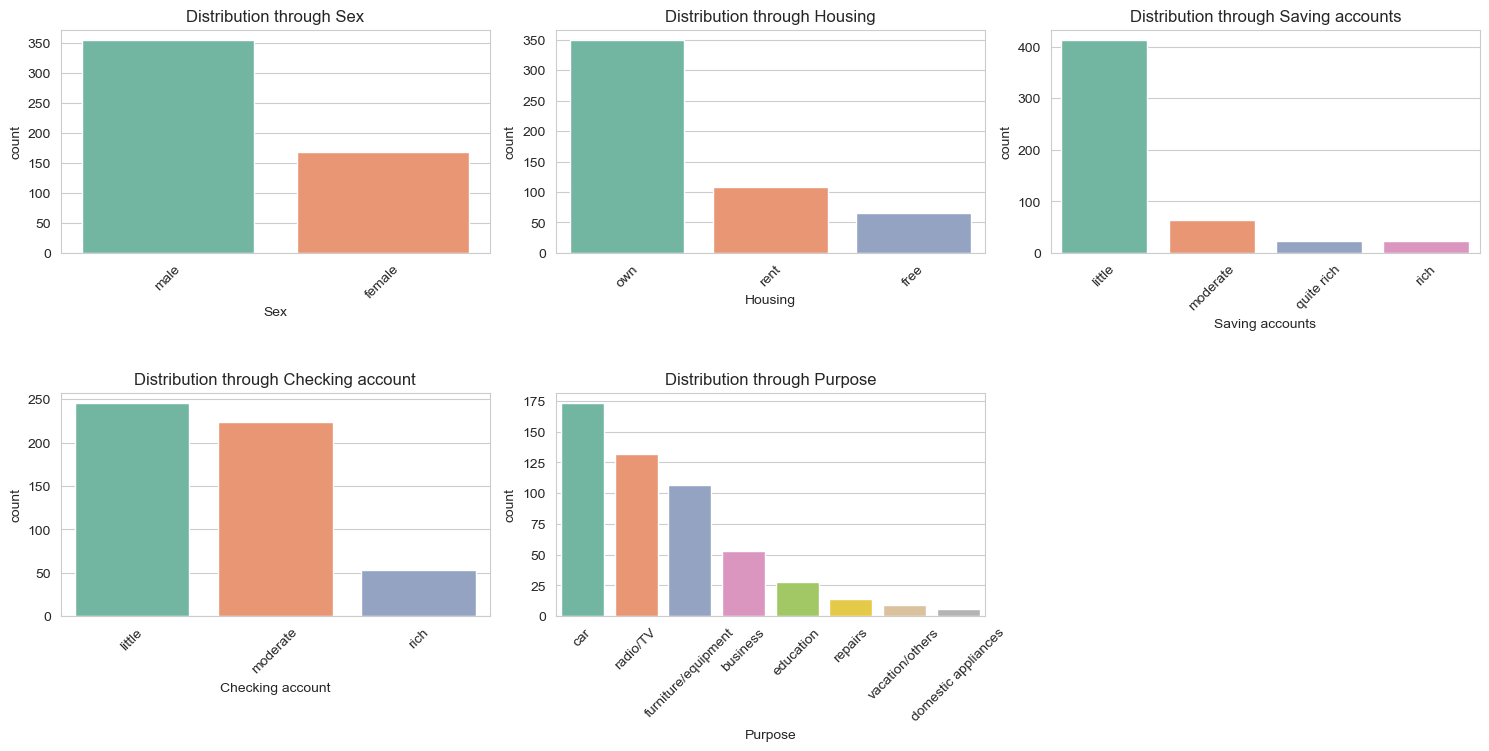

In [23]:
plt.figure(figsize=((15,10)))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2", order= df[col].value_counts().index)
    plt.title(f"Distribution through {col}")
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show

### Correlation

In [24]:
corr = df[["Age","Job","Credit amount","Duration"]].corr()

In [25]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


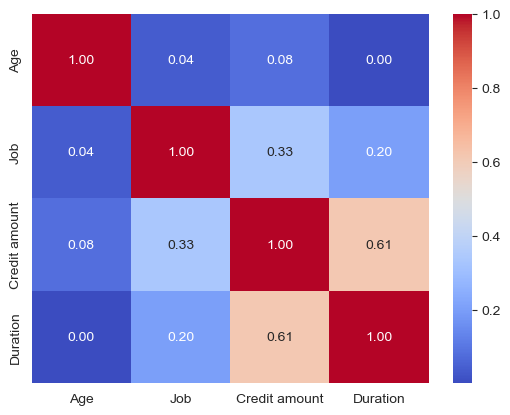

In [26]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [27]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [28]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [29]:
pd.pivot_table(df,values="Credit amount",index="Housing",columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

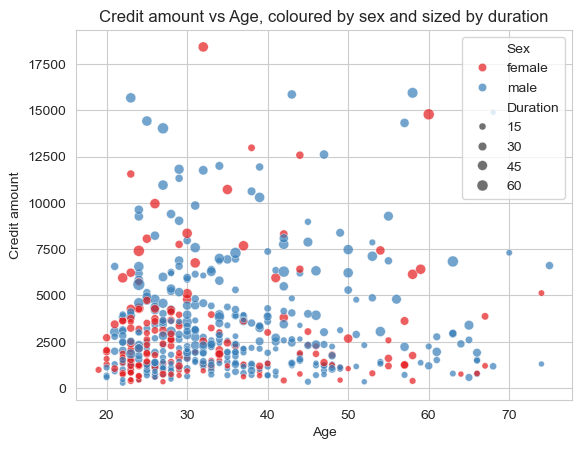

In [30]:
sns.scatterplot(data= df,x="Age",y="Credit amount",hue="Sex",size="Duration",alpha = 0.7,palette="Set1")
plt.title("Credit amount vs Age, coloured by sex and sized by duration")
plt.show

C:\Users\user\AppData\Local\Temp\ipykernel_3304\2391366353.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Saving accounts',y="Credit amount",palette="Pastel1")


<function matplotlib.pyplot.show(close=None, block=None)>

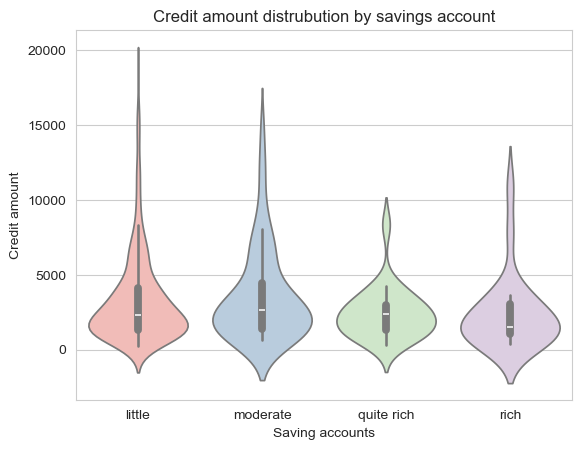

In [31]:
sns.violinplot(data=df,x='Saving accounts',y="Credit amount",palette="Pastel1")
plt.title("Credit amount distrubution by savings account")
plt.show

### Percentage of risk value

In [32]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_3304\1631836197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
C:\Users\user\AppData\Local\Temp\ipykernel_3304\1631836197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
C:\Users\user\AppData\Local\Temp\ipykernel_3304\1631836197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")


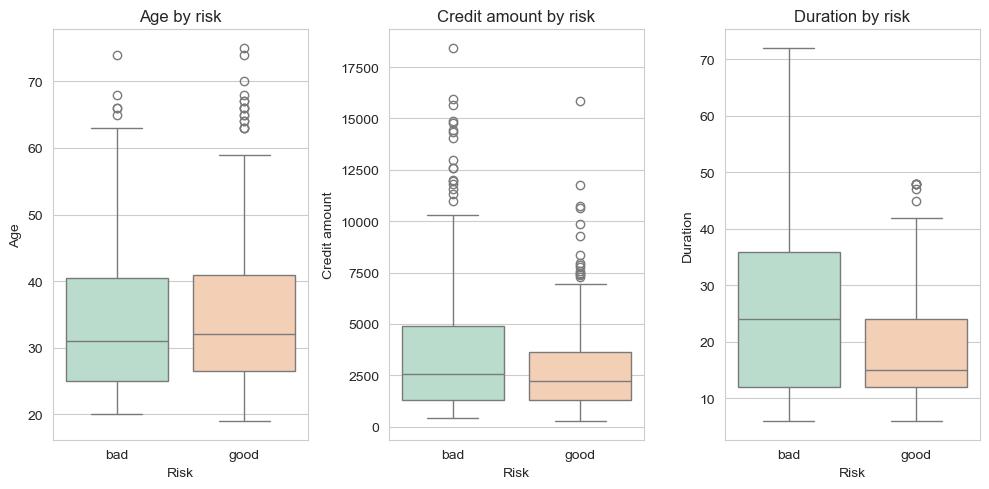

In [33]:
plt.figure(figsize=(10,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x="Risk",y=col,palette="Pastel2")
    plt.title(f"{col} by risk")

plt.tight_layout()
plt.show()

In [34]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


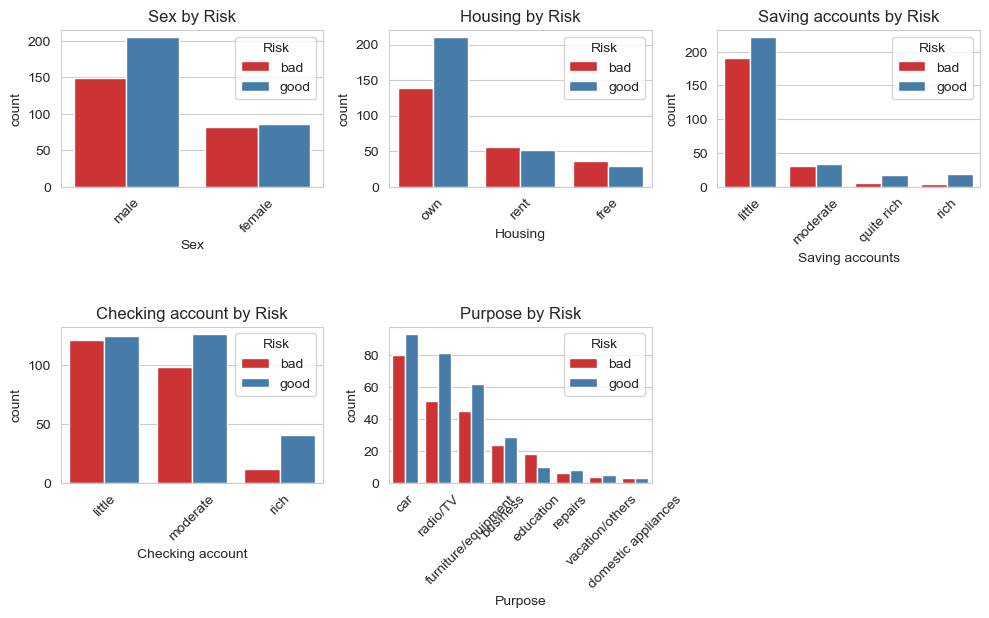

In [35]:
plt.figure(figsize=(10,8))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data= df, x=col,hue= "Risk",palette="Set1",order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

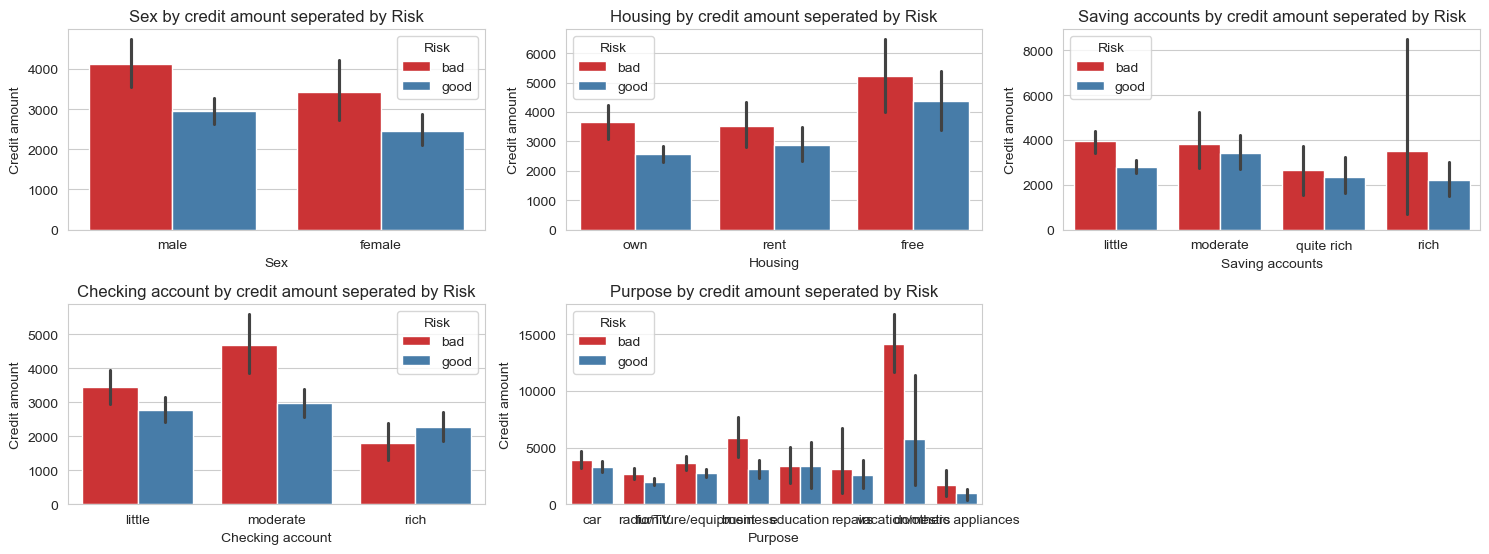

In [36]:
plt.figure(figsize=[15,8])
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.barplot(data = df, x= col,y="Credit amount",hue="Risk",palette="Set1",order=df[col].value_counts().index)
    plt.title(f"{col} by credit amount seperated by Risk")

plt.tight_layout()
plt.show()

In [37]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [38]:
features = ["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]    

In [39]:
target = "Risk"

In [40]:
df_model = df[features+[target]].copy()

In [41]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


### Handling categorical data

In [42]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [43]:
cat_cols = df_model.select_dtypes(include="object").columns.drop("Risk")

In [44]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [45]:
le_dict = {}

In [46]:
for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [47]:
le_dict

{'Sex': LabelEncoder(),
 'Housing': LabelEncoder(),
 'Saving accounts': LabelEncoder(),
 'Checking account': LabelEncoder()}

In [48]:
le_target = LabelEncoder()

In [49]:
target

'Risk'

In [50]:
df_model[target] = le_target.fit_transform(df_model[target])

In [51]:
df_model[target]

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int32

In [ ]:
joblib.dump(le_target,"target_encoder.pkl")

In [52]:
df["Housing"].unique()

array(['own', 'free', 'rent'], dtype=object)

In [53]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [55]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


### Model training

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x = df_model.drop(target, axis=1)

In [58]:
x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30


In [59]:
y = df_model[target]

In [60]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Risk, dtype: int32

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [62]:
x_train.shape

(417, 8)

In [63]:
x_test.shape

(105, 8)

In [64]:
df_model.shape

(522, 9)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [66]:
def train_model(model, param_grid, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(model,param_grid,cv=5, scoring="accuracy",n_jobs= -1)
    grid.fit(x_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    return best_model, acc, grid.best_params_

In [67]:
dt = DecisionTreeClassifier(random_state=1,class_weight="balanced")
dt_param_grid = {
    "max_depth" : [3,5,7,10,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}

In [68]:
best_dt, acc_dt, params_dt = train_model(dt,dt_param_grid,x_train,y_train,x_test,y_test)

In [69]:
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.580952380952381


In [70]:
print("Best parameter",params_dt)

Best parameter {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random forest

In [71]:
rf = RandomForestClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [72]:
rf_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [73]:
best_rf, acc_rf, params_rf = train_model(rf,rf_param_grid,x_train,y_train,x_test,y_test)

In [74]:
print("Random forest accuracy", acc_rf)

Random forest accuracy 0.6190476190476191


In [75]:
print("Best params:",params_rf)

Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


### Extra trees classifier

In [76]:
et = ExtraTreesClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [77]:
et_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [78]:
best_et, acc_et, params_et = train_model(et,et_param_grid,x_train,y_train,x_test,y_test)

In [79]:
print("Extra tress accuracy:",acc_et)

Extra tress accuracy: 0.6476190476190476


In [80]:
print("Best params:",params_et)

Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### Xg boost 

In [81]:
xgb = XGBClassifier(random_state = 1,scale_pos_weight = (y_train == 0).sum()/(y_train==1).sum(),use_label_encoder = False, eval_metric = "logloss")

In [82]:
xgb_param_grid ={
    "n_estimators": [100,200],
    "max_depth": [3,5,7],
    "learning_rate": [0.01,0.1,0.2],
    "subsample": [0.7,1],
    "colsample_bytree": [0.7,1]
}

In [83]:
best_xgb,acc_xgb,params_xgb = train_model(xgb,xgb_param_grid,x_train,y_train,x_test,y_test)

e:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:51:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [84]:
print("Accuracy Xgb boost:",acc_xgb)

Accuracy Xgb boost: 0.6761904761904762


In [85]:
print("Best params:",params_xgb)

Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


In [86]:
joblib.dump(best_xgb,"Xgb_credit_model.pkl")

['Xgb_credit_model.pkl']